**Estimating the price of a house**

This machine learning model estimates the price of a house (in thousands of $) based on its area (square footage). The model is built using `linear regression`. The list of feature(s) and target(s) for the model are detailed below:

**Feature(s)** 
- Square footage of the house (in units of 1000 sq.ft)

**Target(s)** 
- Price of the house (in units of million dollars)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from data_processing import DataProcessing

The `compute_cost` function calculates the cost value based on the following parameters:
- `x` :: List of all feature values (1D - vector of dimensions (m,)).
- `y` :: List of all target values (1D - vector of dimensions (m,)).
- `w` :: Model parameter value (scalar).
- `b` :: Model parameter value (scalar).

In [2]:
def compute_cost(x, y, w, b):
    y_hat = (w * x) + b
    diff = np.square(y_hat - y)
    cost = np.mean(diff)
    cost = cost / 2
    return cost

The `compute_gradient` function  calculates the quantity by which the model parameters - w and b, must be reduced to minimize the value of the cost function. It returns  a tuple - `(dj_dw, dj_db)`, where 
- `dj_dw` :: quantity by which value of `w` must be decreased (scalar).
- `dj_db` :: quanity by which value of `b` must be decreased (scalar).

In [3]:
def compute_gradient(x, y, w, b):
    y_hat = (w * x) + b
    diff = (y_hat - y)
    dj_db = np.mean(diff)
    djdw_i = diff * x
    dj_dw = np.mean(djdw_i)
    return dj_dw, dj_db

In [4]:
dp = DataProcessing("price", "area")
xi, yi = dp.normalize_features(), dp.normalize_targets()
[w, b] = np.random.randn(2)
alpha = 0.009
epoch = 10000
print(f"m = {xi.shape[0]}")
print(f"w = {w}")
print(f"b = {b}")
print(f"alpha = {alpha}")
print(f"Number of iterations = {epoch}")

m = 436
w = -0.793499433407235
b = 1.265322258953207
alpha = 0.009
Number of iterations = 10000


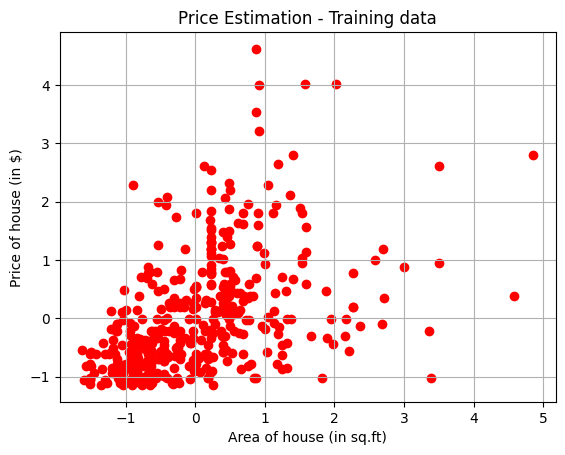

In [5]:
fig, ax = plt.subplots()
ax.scatter(xi, yi, c='r')
ax.set_title("Price Estimation - Training data")
ax.set_xlabel("Area of house (in sq.ft)")
ax.set_ylabel("Price of house (in $)")
ax.grid()

In [6]:
epochs = np.empty(0, dtype='int')
jwbs = np.empty(0, dtype='float')
w_final = b_final = float(0)
min_cost = float('inf')
for i in range(1, epoch + 1):
    dj_dw, dj_db = compute_gradient(xi, yi, w, b)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    cost = compute_cost(xi, yi, w, b)
    epochs = np.append(epochs, i)
    jwbs = np.append(jwbs, cost)
    if i % (math.floor(epoch / 10)) == 0:
        print(f"Iteration {i} :: Cost = {cost} :: w = {float(w)} :: b = {float(b)}")
    
    if cost < min_cost:
        w_final = w
        b_final = b
        min_cost = cost

print(f"Minimum cost = {min_cost} at (w, b) = ({w_final}, {b_final})")

Iteration 1000 :: Cost = 0.38741829777510306 :: w = 0.4743636711578221 :: b = 0.000149918639815475
Iteration 2000 :: Cost = 0.387418275251653 :: w = 0.47451389084356865 :: b = 1.776274672376375e-08
Iteration 3000 :: Cost = 0.3874182752516526 :: w = 0.47451390864198423 :: b = 2.1047734520996628e-12
Iteration 4000 :: Cost = 0.3874182752516527 :: w = 0.47451390864409015 :: b = 4.480775968689667e-16
Iteration 5000 :: Cost = 0.3874182752516526 :: w = 0.47451390864409015 :: b = 1.940422719829907e-16
Iteration 6000 :: Cost = 0.3874182752516526 :: w = 0.47451390864409015 :: b = 1.940422719829907e-16
Iteration 7000 :: Cost = 0.3874182752516526 :: w = 0.47451390864409015 :: b = 1.940422719829907e-16
Iteration 8000 :: Cost = 0.3874182752516526 :: w = 0.47451390864409015 :: b = 1.940422719829907e-16
Iteration 9000 :: Cost = 0.3874182752516526 :: w = 0.47451390864409015 :: b = 1.940422719829907e-16
Iteration 10000 :: Cost = 0.3874182752516526 :: w = 0.47451390864409015 :: b = 1.940422719829907e-16


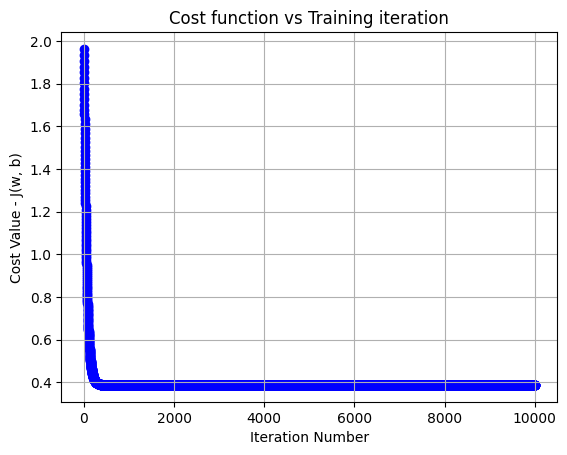

In [7]:
fig, ax = plt.subplots()
ax.set_title("Cost function vs Training iteration")
ax.scatter(epochs, jwbs, c='b')
ax.set_ylabel("Cost Value - J(w, b)")
ax.set_xlabel("Iteration Number")
ax.grid()

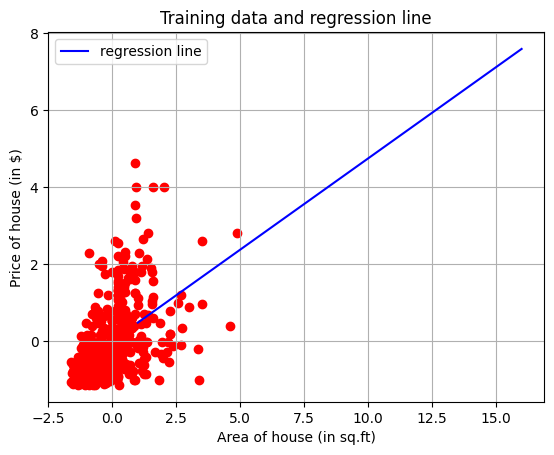

In [8]:
xa = np.linspace(1, 16, epoch, True)
ya = (w_final * xa) + b_final
fig, ax = plt.subplots()
ax.set_title("Training data and regression line")
ax.scatter(xi, yi, c='r')
ax.plot(xa, ya, c='b', label='regression line')
ax.set_xlabel("Area of house (in sq.ft)")
ax.set_ylabel("Price of house (in $)")
ax.legend()
ax.grid()